10000
21


,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


Unique Smokers =  ['Male' 'Female' nan]
Unique Genders =  ['Yes' 'No' nan]


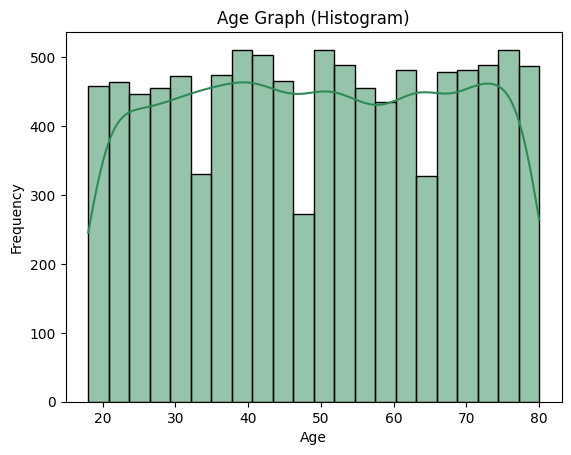

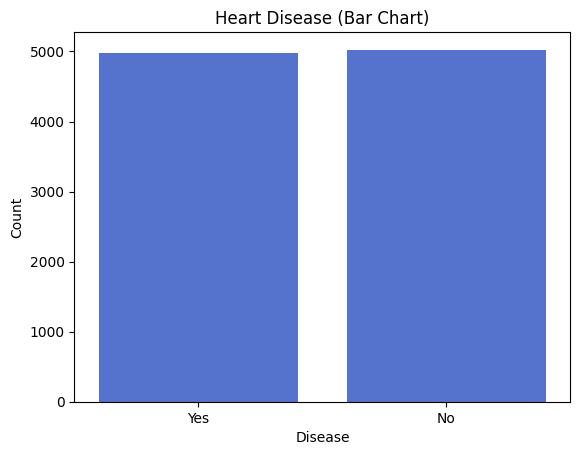

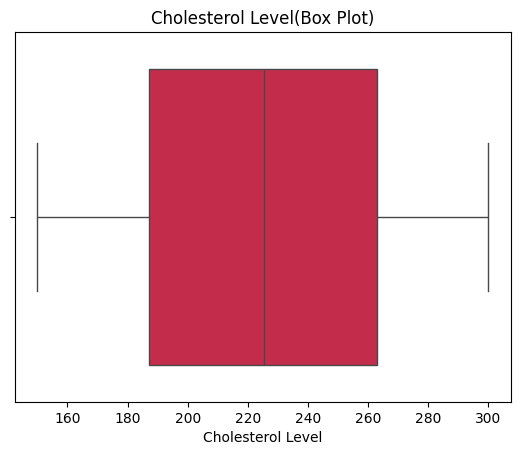

Analyzed Data =         Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0     56.0    Male           153.0              155.0            High     Yes   
1     69.0  Female           146.0              286.0            High      No   
2     46.0    Male           126.0              216.0             Low      No   
3     32.0  Female           122.0              293.0            High     Yes   
4     60.0    Male           166.0              242.0             Low     Yes   
...    ...     ...             ...                ...             ...     ...   
9995  25.0  Female           136.0              243.0          Medium     Yes   
9996  38.0    Male           172.0              154.0          Medium      No   
9997  73.0    Male           152.0              201.0            High     Yes   
9998  23.0    Male           142.0              299.0             Low     Yes   
9999  38.0  Female           128.0              193.0          Medium     Yes   

     Famil

In [ ]:
import numpy as n
import pandas as p
import matplotlib.pyplot as mt
import seaborn as s
from IPython.display import display

path  = r"C:\Users\Lenovo\OneDrive\Desktop\python\heart_disease.csv"
df = p.read_csv(path)

#---------------------Rows and Columns -----------------#
row = df.shape[0]
col = df.shape[1]
print(row)
print(col)


#-----------------------summary-------------------------#
summary = df.describe()
display(summary)


#--------------------Count of Unique Values ------------# 
Unique_Gender = df['Gender'].unique()
Unique_Smoking = df['Smoking'].unique()
print("Unique Smokers = ",Unique_Gender)
print("Unique Genders = ",Unique_Smoking)


#-------------------------Error Handling -----------------#
for i in df.columns:
    if df[i].dtype == "object":  
        df[i] = df[i].fillna(df[i].mode()[0]) 
    else:
        if df[i].isnull().sum() > 0: 
            if (3*(df[i].mean() - df[i].median())/df[i].std()) > 0:  
                df[i] = df[i].fillna(df[i].median())
            else:  
                df[i] = df[i].fillna(df[i].mean())
           
#-------------------------------Histogram-----------------------------#
s.histplot(df['Age'],bins="auto",kde=True,color="seagreen")
mt.title('Age Graph (Histogram)')
mt.xlabel('Age')
mt.ylabel('Frequency')
mt.show()

             
#---------------------------------Bar Chart --------------------------#            
s.countplot(x='Family Heart Disease',data=df,color='royalblue')
mt.title('Heart Disease (Bar Chart)')
mt.xlabel('Disease')
mt.ylabel('Count')
mt.show()          

#-----------------------------Box Plot---------------------------------#
s.boxplot(x=df["Cholesterol Level"],data=df,color="crimson")
mt.title('Cholesterol Level(Box Plot)')
mt.xlabel('Cholesterol Level')
mt.show()
Q1 = df["Cholesterol Level"].quantile(0.25)
Q3 = df["Cholesterol Level"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[df["Cholesterol Level"].between(lower_bound, upper_bound, inclusive="neither")]
display("Analyzed Data = ", outliers)       
         
         
         
         
         
         